https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

https://www.cienciadedatos.net/documentos/37_clustering_y_heatmaps

In [1]:
from Database import db_mongo

import string

from Utilities import clean_text

In [2]:
db = db_mongo.db_mongo()

db.insert_text({"text":"Text content"})

df = db.get_text(100000)

#df = df.sample(frac=1).reset_index(drop=True)

Init DB


In [3]:
ct = clean_text.CleanText()

result = ct.cleanner_process(df)

print(result[0])

['i', 'd']


In [3]:
all_text = list()
all_titles = df["class"].unique()

print(df)

for item in df["text"]:
   
    text = item.encode('utf8')
   
    nopunc = [word.replace('\n'," ").replace('\x0c'," ") for word in item if word not in string.punctuation]
       
    nopunc = ''.join(nopunc)
    
    all_text.append(nopunc.lower())

                                        _id  \
0      ee9c6ab0-02d3-4dbc-8ff6-374c02568e38   
1      d2a8dbed-8ea0-40b5-9cd4-2f374558154f   
2      c747b25a-e364-4d5a-85d4-7dd55cb5ad34   
3      3afdc747-4428-405d-a83b-cb1d08715268   
4      d2cf4171-b3b9-4fda-9199-2563ee67f48e   
...                                     ...   
33669  9fe0cb17-5aa1-4945-85ba-3299874278a9   
33670  4795c883-734c-4633-a760-d05595ff7ae7   
33671  17155603-603e-4d19-82a6-cf45571c70d6   
33672  0f2373dc-b0d8-446a-89ce-0a66c137c02c   
33673  36ad79e9-093c-4f54-bf61-7453f39dda82   

                                                    text        class  
0      Academic, ANSYS, AutoCAD, basic, CNC, Directio...  ENGINEERING  
1      Academic, ANSYS, AutoCAD, basic, CNC, Directio...  ENGINEERING  
2      08/2014 to 12/2014 Company Name\ne Sponsored b...  ENGINEERING  
3      Education\n\nMaster of Science : Mechanical En...  ENGINEERING  
4      e Sponsored by New York State Energy Research ...  ENGINEERING  
...

In [4]:
import pandas as pd

title=[]
for article in all_titles:
    #print("loading content: ",article)
    #wiki_lst.append(all_tes)
    title.append(article)


In [5]:
title

['ENGINEERING',
 'BANKING',
 'CONSULTANT',
 'CHEF',
 'FINANCE',
 'INFORMATION-TECHNOLOGY',
 'DIGITAL-MEDIA',
 'AUTOMOBILE',
 'AVIATION',
 'ARTS',
 'FITNESS',
 'TEACHER',
 'HEALTHCARE',
 'APPAREL',
 'ADVOCATE',
 'HR',
 'SALES',
 'ACCOUNTANT',
 'PUBLIC-RELATIONS',
 'BUSINESS-DEVELOPMENT',
 'AGRICULTURE',
 'DESIGNER',
 'CONSTRUCTION',
 'BPO',
 nan]

In [6]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/kguttas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Limpiar Texto

In [8]:
import re

regex = re.compile('[^a-zA-Z ]')

new_text = list()

for item in all_text:
    text = regex.sub('', item)
    new_text.append(text)
    
all_text = new_text.copy()

In [9]:
all_text[20]

'skills  accounting accruals accrual acquisitions streamline adp payroll ad as balance sheet banking billing budgets budget business case business development business processes citrix closing consulting corporate finance clients databases documentation drivers due diligence essbase executive management senior management fast finance financial financial analysis financial analysis and reporting financial reporting forecasting general ledger great plains hyperion information technology investments jd edwards managing mark market marketing meetings access microsoft access ms access microsoft excel ms excel ms office suite powerpoint modeling performance management policies pricing processes quality record keeping reporting research sap sql statistics  '

In [10]:
new_text = list()

for item in all_text:
    text = re.sub(r'\b\w{1,3}\b', ' ', item)
    new_text.append(text)
    
all_text = new_text.copy()

In [11]:
all_text[20]

'skills  accounting accruals accrual acquisitions streamline   payroll     balance sheet banking billing budgets budget business case business development business processes citrix closing consulting corporate finance clients databases documentation drivers   diligence essbase executive management senior management fast finance financial financial analysis financial analysis   reporting financial reporting forecasting general ledger great plains hyperion information technology investments   edwards managing mark market marketing meetings access microsoft access   access microsoft excel   excel   office suite powerpoint modeling performance management policies pricing processes quality record keeping reporting research     statistics  '

In [12]:
new_text = list()

for item in all_text:
    text = re.sub(" +"," ", item)
    new_text.append(text)
    
all_text = new_text.copy()

In [13]:
all_text[20]

'skills accounting accruals accrual acquisitions streamline payroll balance sheet banking billing budgets budget business case business development business processes citrix closing consulting corporate finance clients databases documentation drivers diligence essbase executive management senior management fast finance financial financial analysis financial analysis reporting financial reporting forecasting general ledger great plains hyperion information technology investments edwards managing mark market marketing meetings access microsoft access access microsoft excel excel office suite powerpoint modeling performance management policies pricing processes quality record keeping reporting research statistics '

In [14]:
import string

new_text = list()

for item in all_text:
    text = "".join([i for i in item if i not in string.punctuation])
    new_text.append(text)
    
all_text = new_text.copy()

In [15]:
all_text[20]

'skills accounting accruals accrual acquisitions streamline payroll balance sheet banking billing budgets budget business case business development business processes citrix closing consulting corporate finance clients databases documentation drivers diligence essbase executive management senior management fast finance financial financial analysis financial analysis reporting financial reporting forecasting general ledger great plains hyperion information technology investments edwards managing mark market marketing meetings access microsoft access access microsoft excel excel office suite powerpoint modeling performance management policies pricing processes quality record keeping reporting research statistics '

In [16]:
import string

new_text = list()

for item in all_text:
    text = "".join([i.lower() for i in item if i not in string.punctuation])
    new_text.append(text)
    
all_text = new_text.copy()

In [17]:
all_text[20]

'skills accounting accruals accrual acquisitions streamline payroll balance sheet banking billing budgets budget business case business development business processes citrix closing consulting corporate finance clients databases documentation drivers diligence essbase executive management senior management fast finance financial financial analysis financial analysis reporting financial reporting forecasting general ledger great plains hyperion information technology investments edwards managing mark market marketing meetings access microsoft access access microsoft excel excel office suite powerpoint modeling performance management policies pricing processes quality record keeping reporting research statistics '

In [18]:
ps = nltk.PorterStemmer()


new_list = list()
for item in all_text:
        
    new_text = " ".join([ps.stem(word) for word in item.split(' ')])
    
    new_list.append(new_text)

all_text = new_list.copy()

In [19]:
all_text[20]

'skill account accrual accrual acquisit streamlin payrol balanc sheet bank bill budget budget busi case busi develop busi process citrix close consult corpor financ client databas document driver dilig essbas execut manag senior manag fast financ financi financi analysi financi analysi report financi report forecast gener ledger great plain hyperion inform technolog invest edward manag mark market market meet access microsoft access access microsoft excel excel offic suit powerpoint model perform manag polici price process qualiti record keep report research statist '

In [20]:
wn = nltk.WordNetLemmatizer()

new_list = list()
for item in all_text:
        
    new_text = " ".join([wn.lemmatize(word) for word in item.split(' ')])
    
    new_list.append(new_text)

all_text = new_list.copy()

In [21]:
all_text[20]

'skill account accrual accrual acquisit streamlin payrol balanc sheet bank bill budget budget busi case busi develop busi process citrix close consult corpor financ client databas document driver dilig essbas execut manag senior manag fast financ financi financi analysi financi analysi report financi report forecast gener ledger great plain hyperion inform technolog invest edward manag mark market market meet access microsoft access access microsoft excel excel offic suit powerpoint model perform manag polici price process qualiti record keep report research statist '

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2),
                    max_df=0.2, min_df=0.00009, max_features=50000)
%time tfidf_matrix = tfidf_vectorizer.fit_transform(all_text) 

print(tfidf_matrix.shape)

X = tfidf_matrix

CPU times: user 4.11 s, sys: 108 ms, total: 4.22 s
Wall time: 4.22 s
(33674, 50000)


In [23]:
print(tfidf_vectorizer.get_feature_names())
print(X.shape)

['aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aami', 'aaron', 'abandon', 'abbott', 'abbott nutrit', 'aberdeen', 'abid', 'abil', 'abil abil', 'abil achiev', 'abil adapt', 'abil address', 'abil allow', 'abil analyz', 'abil ass', 'abil build', 'abil commun', 'abil complet', 'abil coordin', 'abil creat', 'abil critic', 'abil deal', 'abil deliv', 'abil demonstr', 'abil design', 'abil determin', 'abil develop', 'abil drive', 'abil effect', 'abil establish', 'abil evalu', 'abil excel', 'abil execut', 'abil experi', 'abil follow', 'abil gain', 'abil grow', 'abil handl', 'abil identifi', 'abil implement', 'abil interact', 'abil interpret', 'abil lead', 'abil learn', 'abil maintain', 'abil make', 'abil manag', 'abil meet', 'abil motiv', 'abil multitask', 'abil need', 'abil oper', 'abil organ', 'abil perform', 'abil plan', 'abil posit', 'abil prepar', 'abil priorit', 'abil produc', 'abil profession', 'abi

In [24]:
print(X)

  (0, 12057)	0.20288453676540685
  (0, 42915)	0.1950528014514668
  (0, 38458)	0.21232215170097749
  (0, 49283)	0.21010370982164997
  (0, 32946)	0.1794799873058324
  (0, 33291)	0.14168051802318538
  (0, 33312)	0.21477452542268
  (0, 29768)	0.16804865432424115
  (0, 27611)	0.09050059809951985
  (0, 15986)	0.12515840363210382
  (0, 26712)	0.1973823462739253
  (0, 26585)	0.20621535520632606
  (0, 13542)	0.19397000052586474
  (0, 13359)	0.1838375273515494
  (0, 12928)	0.16770381805576423
  (0, 2155)	0.20288453676540685
  (0, 47712)	0.12970117792262806
  (0, 11808)	0.0707469745951381
  (0, 42900)	0.09708523483705978
  (0, 42539)	0.15467818844476555
  (0, 40415)	0.18186936769438453
  (0, 40409)	0.14651353652726046
  (0, 40249)	0.13426818184679917
  (0, 38374)	0.08043027722486334
  (0, 34999)	0.10234924389975644
  :	:
  (33665, 9014)	0.3937013057507404
  (33666, 46423)	0.6992540716676237
  (33666, 46422)	0.5966934096388294
  (33666, 9014)	0.3937013057507404
  (33667, 46423)	0.6992540716676237


In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

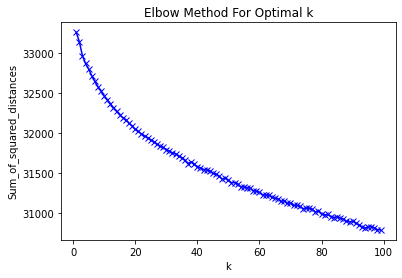

In [26]:
Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k, max_iter=30, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                     title  cluster
9                     ARTS        2
24                     NaN        3
22            CONSTRUCTION        3
21                DESIGNER        3
15                      HR        3
4                  FINANCE        3
23                     BPO        3
12              HEALTHCARE        5
8                 AVIATION        8
20             AGRICULTURE        8
19    BUSINESS-DEVELOPMENT        8
18        PUBLIC-RELATIONS        8
17              ACCOUNTANT        8
14                ADVOCATE        8
16                   SALES        8
11                 TEACHER        8
10                 FITNESS        8
13                 APPAREL        8
1                  BANKING       13
0              ENGINEERING       13
3                     CHEF       15
7               AUTOMOBILE       15
5   INFORMATION-TECHNOLOGY       15
6            DIGITAL-MEDIA       15
2               CONSULTANT       15


Cluster: 0
Titles
Series([], )


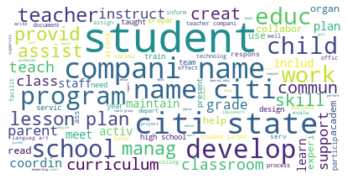

Cluster: 1
Titles
Series([], )


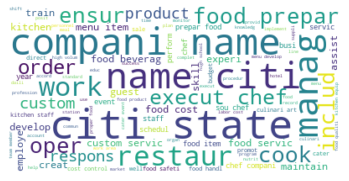

Cluster: 2
Titles
ARTS


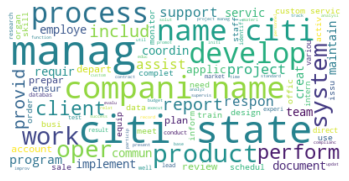

Cluster: 3
Titles
     FINANCE
          HR
    DESIGNER
CONSTRUCTION
         BPO
         NaN


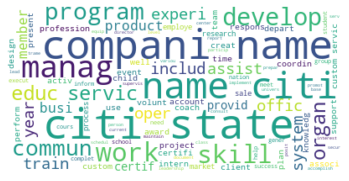

Cluster: 4
Titles
Series([], )


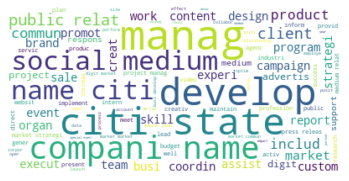

Cluster: 5
Titles
HEALTHCARE


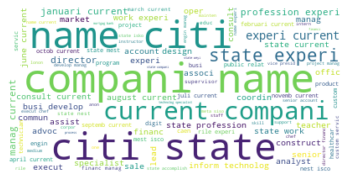

Cluster: 6
Titles
Series([], )


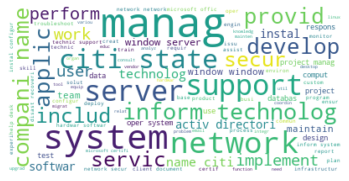

Cluster: 7
Titles
Series([], )


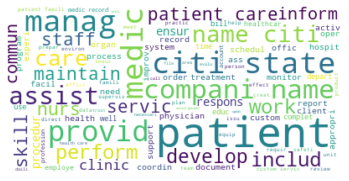

Cluster: 8
Titles
            AVIATION
             FITNESS
             TEACHER
             APPAREL
            ADVOCATE
               SALES
          ACCOUNTANT
    PUBLIC-RELATIONS
BUSINESS-DEVELOPMENT
         AGRICULTURE


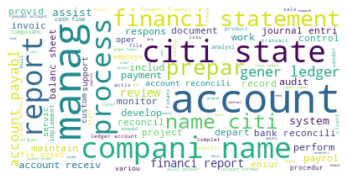

Cluster: 9
Titles
Series([], )


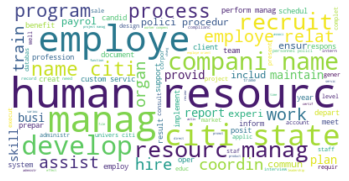

Cluster: 10
Titles
Series([], )


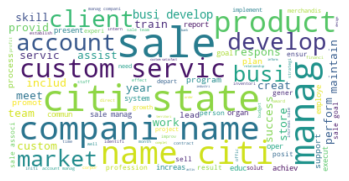

Cluster: 11
Titles
Series([], )


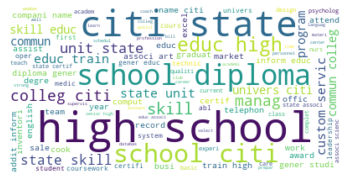

Cluster: 12
Titles
Series([], )


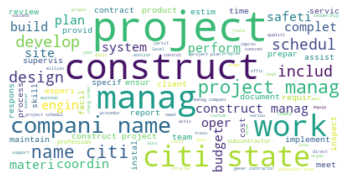

Cluster: 13
Titles
ENGINEERING
    BANKING


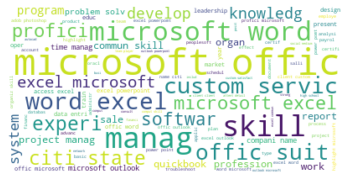

Cluster: 14
Titles
Series([], )


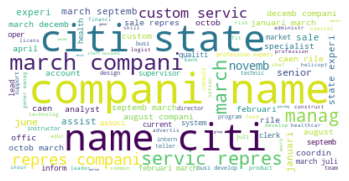

Cluster: 15
Titles
            CONSULTANT
                  CHEF
INFORMATION-TECHNOLOGY
         DIGITAL-MEDIA
            AUTOMOBILE


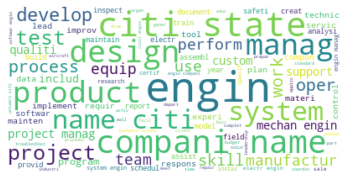

Cluster: 16
Titles
Series([], )


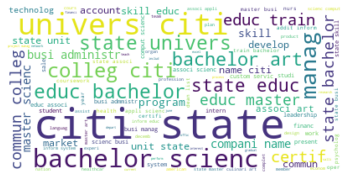

Cluster: 17
Titles
Series([], )


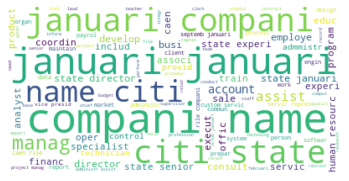

Cluster: 18
Titles
Series([], )


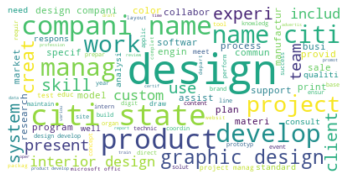

Cluster: 19
Titles
Series([], )


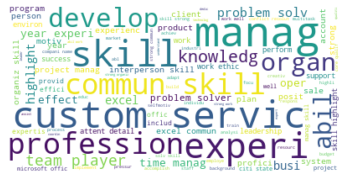

In [37]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':all_text}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [29]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

In [30]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 award
 honor
 societi
 medal
 honor societi
 nation
 dean
 scholarship
 list
 recipi
Cluster 1:
 septemb
 septemb compani
 compani septemb
 march
 novemb
 caen
 april
 june
 januari
 septemb januari
Cluster 2:
 engin
 test
 equip
 product
 mechan
 electr
 manufactur
 design
 project
 process
Cluster 3:
 project
 construct
 project manag
 plan
 site
 schedul
 budget
 construct manag
 engin
 team
Cluster 4:
 high school
 school
 high
 diploma
 school diploma
 school citi
 educ
 educ high
 colleg
 state skill
Cluster 5:
 program
 assist
 member
 team
 oper
 year
 certif
 train
 plan
 organ
Cluster 6:
 current compani
 current
 manag current
 experi compani
 januari current
 profession experi
 januari
 director
 work experi
 august current
Cluster 7:
 microsoft
 microsoft offic
 offic
 suit
 offic suit
 profici
 excel
 adob
 softwar
 highlight
Cluster 8:
 market
 sale
 strategi
 product
 busi
 client
 brand
 campaign
 plan
 strateg
Cluster 9:
 word
 microsoft
 excel
 word excel

In [31]:
pred_text = ['I was a doctor for ten years and worked in the hospital for the cancer.']

In [32]:
%time tfidf_matrix_pred = tfidf_vectorizer.transform(pred_text) #fit the vectorizer to synopses

CPU times: user 1.82 ms, sys: 700 µs, total: 2.52 ms
Wall time: 1.88 ms


In [33]:
# predict cluster labels for new dataset
cluster = model.predict(tfidf_matrix_pred)[0]

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
print(model.labels_)




print("Text belongs to cluster number {0}".format(cluster))

[ 9  9  2 ... 10 10 10]
Text belongs to cluster number 5


In [34]:
print(cluster)

5


In [35]:
for ind in order_centroids[cluster, :10]:
    print(' %s' % terms[ind])

 program
 assist
 member
 team
 oper
 year
 certif
 train
 plan
 organ
